参考：https://tslearn.readthedocs.io/en/stable/auto_examples/clustering/plot_kmeans.html#sphx-glr-auto-examples-clustering-plot-kmeans-py

In [44]:
import numpy as np
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
from tslearn.metrics import dtw, soft_dtw

Euclidean k-means
15.795 --> 7.716 --> 7.716 --> 
DBA k-means
Init 1
0.637 --> 0.458 --> 0.458 --> 
Init 2
0.826 --> 0.525 --> 0.477 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


0.472 --> 0.472 --> 
Soft-DTW k-means
0.472 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


0.144 --> 0.142 --> 0.143 --> 0.142 --> 0.143 --> 0.142 --> 0.143 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 0.142 --> 


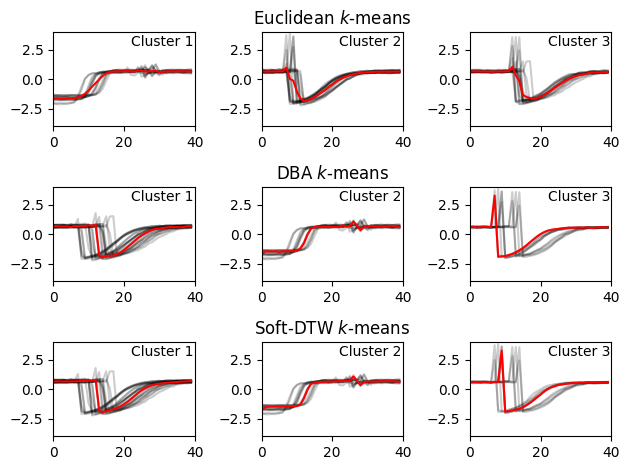

In [26]:
seed = 0
np.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
np.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
# Make time series shorter
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
            transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                            n_init=2,
                            metric="dtw",
                            verbose=True,
                            max_iter_barycenter=10,
                            random_state=seed)
y_pred = dba_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
            transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                            metric="softdtw",
                            metric_params={"gamma": .01},
                            verbose=True,
                            random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
            transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

サンプリング間隔のリサンプリング無し

Euclidean k-means
122.882 --> 59.882 --> 59.882 --> 
DBA k-means
Init 1


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


1.307 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


0.573 --> 0.573 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s



Init 2


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


1.517 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


0.580 --> 0.580 --> 
Soft-DTW k-means


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


10.031 --> 9.584 --> 9.601 --> 9.601 --> 9.608 --> 9.613 --> 9.615 --> 9.617 --> 9.616 --> 9.621 --> 9.620 --> 9.624 --> 9.622 --> 9.626 --> 9.624 --> 9.628 --> 9.626 --> 9.630 --> 9.627 --> 9.631 --> 9.629 --> 9.633 --> 9.630 --> 9.634 --> 9.632 --> 9.635 --> 9.633 --> 9.636 --> 9.634 --> 9.638 --> 9.635 --> 9.639 --> 9.636 --> 9.640 --> 9.637 --> 9.641 --> 9.638 --> 9.642 --> 9.639 --> 9.643 --> 9.640 --> 9.644 --> 9.641 --> 9.645 --> 9.642 --> 9.646 --> 9.643 --> 9.647 --> 9.644 --> 9.647 --> 


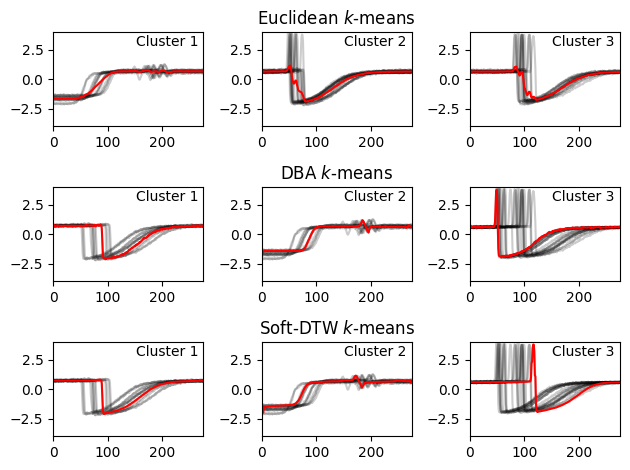

In [27]:
seed = 0
np.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
np.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])

sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
            transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                            n_init=2,
                            metric="dtw",
                            verbose=True,
                            max_iter_barycenter=10,
                            random_state=seed)
y_pred = dba_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
            transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                            metric="softdtw",
                            metric_params={"gamma": .01},
                            verbose=True,
                            random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
            transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

### DBA k-meansについて結果の確認

In [14]:
# クラスターセンターの形状
dba_km.cluster_centers_.shape

(3, 275, 1)

In [15]:
# センターからの距離の総和
dba_km.inertia_

0.5734112328279022

In [19]:
# dtw
for i in range(3):
    dist = dtw(X_train[1], dba_km.cluster_centers_[i])
    print(dist)

0.41569496733767974
16.390028711851183
5.17510052432421


In [28]:
dba_km.predict([X_train[1]])

array([0])

BICの計算

In [41]:
# dtwからbic計算
k_cluster = 3
bic = 0
for n in range(len(X_train)):
    p_sum = 0
    for i in range(3):
        dist = dtw(X_train[n], dba_km.cluster_centers_[i])
        p_ = np.exp(-(dist**2)/2) / (2*np.pi)**(1/2)
        p_sum += p_
    
    bic -= np.log(p_sum / k_cluster)

bic += k_cluster * X_train.shape[1] * np.log(X_train.shape[0]) / 2
print(bic)


1728.9222828991888


In [68]:
def calc_bic(X_train, km, k_cluster, soft=0):
    bic = 0
    for n in range(len(X_train)):
        p_sum = 0
        for i in range(k_cluster):
            if soft == 0:
                dist = dtw(X_train[n], km.cluster_centers_[i])
            elif soft == 1:
                dist = soft_dtw(X_train[n], km.cluster_centers_[i], gamma=0.01)
            p_ = np.exp(-(dist**2)/2) / (2*np.pi)**(1/2)
            p_sum += p_
        
        bic -= np.log(p_sum / k_cluster)
    bic += k_cluster * X_train.shape[1] * np.log(X_train.shape[0]) / 2

    return bic

def calc_aic(X_train, km, k_cluster, soft=0):
    aic = 0
    for n in range(len(X_train)):
        p_sum = 0
        for i in range(k_cluster):
            if soft == 0:
                dist = dtw(X_train[n], km.cluster_centers_[i])
            elif soft == 1:
                dist = soft_dtw(X_train[n], km.cluster_centers_[i], gamma=0.01)
            p_ = np.exp(-(dist**2)/2) / (2*np.pi)**(1/2)
            p_sum += p_
        
        aic -= np.log(p_sum / k_cluster)
    aic += k_cluster * X_train.shape[1]

    return aic

In [56]:
calc_bic(X_train, dba_km, k_cluster, 1)

587.9513343282501

### クラスター数をBICから決定

In [64]:
seed = 0
np.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
np.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])

# Make time series shorter
# X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

# DBA-k-means
for i in range(5):
    k_cluster = i+1

    print(f'DBA k-means {k_cluster}')
    dba_km = TimeSeriesKMeans(n_clusters=k_cluster,
                                n_init=2,
                                metric="dtw",
                                verbose=False,
                                max_iter_barycenter=10,
                                random_state=seed)
    y_pred = dba_km.fit_predict(X_train)

    print('bic: ', calc_bic(X_train, dba_km, k_cluster, 0))


# for yi in range(3):
#     plt.subplot(3, 3, 4 + yi)
#     for xx in X_train[y_pred == yi]:
#         plt.plot(xx.ravel(), "k-", alpha=.2)
#     plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
#     plt.ylim(-4, 4)
#     plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
#             transform=plt.gca().transAxes)
#     if yi == 1:
#         plt.title("DBA $k$-means")


# plt.tight_layout()
# plt.show()

DBA k-means 1
bic:  1061.124780353796
DBA k-means 2
bic:  1231.6472190505647
DBA k-means 3
bic:  1728.9222828991888
DBA k-means 4
bic:  2277.968949339851
DBA k-means 5
bic:  2823.2267309005056


### クラスター数をAICから決定

In [65]:
seed = 0
np.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
np.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])

# Make time series shorter
# X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

# DBA-k-means
for i in range(5):
    k_cluster = i+1

    print(f'DBA k-means {k_cluster}')
    dba_km = TimeSeriesKMeans(n_clusters=k_cluster,
                                n_init=2,
                                metric="dtw",
                                verbose=False,
                                max_iter_barycenter=10,
                                random_state=seed)
    y_pred = dba_km.fit_predict(X_train)

    print('aic: ', calc_aic(X_train, dba_km, k_cluster, 0))






# for yi in range(3):
#     plt.subplot(3, 3, 4 + yi)
#     for xx in X_train[y_pred == yi]:
#         plt.plot(xx.ravel(), "k-", alpha=.2)
#     plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
#     plt.ylim(-4, 4)
#     plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
#             transform=plt.gca().transAxes)
#     if yi == 1:
#         plt.title("DBA $k$-means")


# plt.tight_layout()
# plt.show()

DBA k-means 1
aic:  798.221617107426
DBA k-means 2
aic:  705.8408925578246
DBA k-means 3
aic:  940.2127931600785
DBA k-means 4
aic:  1226.356296354371
DBA k-means 5
aic:  1508.710914668655


事前にスケールしない

In [76]:
seed = 0
np.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
np.random.shuffle(X_train)
# Keep only 50 time series
# X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])

# Make time series shorter
# X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

# DBA-k-means
for i in range(5):
    k_cluster = i+1

    print(f'DBA k-means {k_cluster}')
    dba_km = TimeSeriesKMeans(n_clusters=k_cluster,
                                n_init=2,
                                metric="dtw",
                                verbose=False,
                                max_iter_barycenter=10,
                                random_state=seed)
    y_pred = dba_km.fit_predict(X_train)

    print('aic: ', calc_aic(X_train, dba_km, k_cluster, 0))

DBA k-means 1
aic:  957.5382089714619
DBA k-means 2
aic:  763.5509116210358
DBA k-means 3
aic:  983.9705965181292
DBA k-means 4
aic:  1272.55883890307
DBA k-means 5
aic:  1552.8155811463912


サンプリングレート下げる

In [77]:
seed = 0
np.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
np.random.shuffle(X_train)
# Keep only 50 time series
# X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])

# Make time series shorter
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

# DBA-k-means
for i in range(5):
    k_cluster = i+1

    print(f'DBA k-means {k_cluster}')
    dba_km = TimeSeriesKMeans(n_clusters=k_cluster,
                                n_init=2,
                                metric="dtw",
                                verbose=False,
                                max_iter_barycenter=10,
                                random_state=seed)
    y_pred = dba_km.fit_predict(X_train)

    print('aic: ', calc_aic(X_train, dba_km, k_cluster, 0))

DBA k-means 1
aic:  364.20147333647026
DBA k-means 2
aic:  236.7208513979323
DBA k-means 3
aic:  270.9823975169212
DBA k-means 4
aic:  312.1765303533631
DBA k-means 5
aic:  353.90067592489623


## soft DTW

In [70]:
seed = 0
np.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
np.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])

# Make time series shorter
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

# Soft-DTW-k-means
for i in range(5):
    k_cluster = i+1

    print(f'Soft-DTW k-means {k_cluster}')
    sdtw_km = TimeSeriesKMeans(n_clusters=k_cluster,
                                metric="softdtw",
                                metric_params={"gamma": .01},
                                verbose=False,
                                random_state=seed)
    y_pred = sdtw_km.fit_predict(X_train)

    print('bic: ', calc_bic(X_train, sdtw_km, k_cluster, 1))


# for yi in range(3):
#     plt.subplot(3, 3, 7 + yi)
#     for xx in X_train[y_pred == yi]:
#         plt.plot(xx.ravel(), "k-", alpha=.2)
#     plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
#     plt.ylim(-4, 4)
#     plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
#             transform=plt.gca().transAxes)
#     if yi == 1:
#         plt.title("Soft-DTW $k$-means")

# plt.tight_layout()
# plt.show()

Soft-DTW k-means 1
bic:  5398.048802854202
Soft-DTW k-means 2
bic:  318.097116578847
Soft-DTW k-means 3
bic:  338.8127935470844
Soft-DTW k-means 4
bic:  427.4029019758237
Soft-DTW k-means 5
bic:  508.5964878041042


In [71]:
seed = 0
np.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
np.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])

# Make time series shorter
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

# Soft-DTW-k-means
for i in range(5):
    k_cluster = i+1

    print(f'Soft-DTW k-means {k_cluster}')
    sdtw_km = TimeSeriesKMeans(n_clusters=k_cluster,
                                metric="softdtw",
                                metric_params={"gamma": .01},
                                verbose=False,
                                random_state=seed)
    y_pred = sdtw_km.fit_predict(X_train)

    print('aic: ', calc_aic(X_train, sdtw_km, k_cluster, 1))


# for yi in range(3):
#     plt.subplot(3, 3, 7 + yi)
#     for xx in X_train[y_pred == yi]:
#         plt.plot(xx.ravel(), "k-", alpha=.2)
#     plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
#     plt.ylim(-4, 4)
#     plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
#             transform=plt.gca().transAxes)
#     if yi == 1:
#         plt.title("Soft-DTW $k$-means")

# plt.tight_layout()
# plt.show()

Soft-DTW k-means 1
aic:  5359.8083427456395
Soft-DTW k-means 2
aic:  241.61619636172117
Soft-DTW k-means 3
aic:  224.09141322139567
Soft-DTW k-means 4
aic:  274.441061541572
Soft-DTW k-means 5
aic:  317.3941872612895


In [73]:
seed = 0
np.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
np.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])

# Make time series shorter
# X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

# Soft-DTW-k-means
for i in range(5):
    k_cluster = i+1

    print(f'Soft-DTW k-means {k_cluster}')
    sdtw_km = TimeSeriesKMeans(n_clusters=k_cluster,
                                metric="softdtw",
                                metric_params={"gamma": .01},
                                verbose=False,
                                n_jobs=-1,
                                random_state=seed)
    y_pred = sdtw_km.fit_predict(X_train)

    print('aic: ', calc_aic(X_train, sdtw_km, k_cluster, 1))

Soft-DTW k-means 1
aic:  12803.934320802085
Soft-DTW k-means 2
aic:  750.3530002949694
Soft-DTW k-means 3
aic:  1166.9964356161229
Soft-DTW k-means 4
aic:  1466.6759987206487
Soft-DTW k-means 5
aic:  1737.5760623979509


事前にスケールしない

In [75]:
seed = 0
np.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
np.random.shuffle(X_train)
# Keep only 50 time series
# X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])

# Make time series shorter
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]
print(X_train.shape)

# Soft-DTW-k-means
for i in range(5):
    k_cluster = i+1

    print(f'Soft-DTW k-means {k_cluster}')
    sdtw_km = TimeSeriesKMeans(n_clusters=k_cluster,
                                metric="softdtw",
                                metric_params={"gamma": .01},
                                verbose=False,
                                n_jobs=-1,
                                random_state=seed)
    y_pred = sdtw_km.fit_predict(X_train)

    print('aic: ', calc_aic(X_train, sdtw_km, k_cluster, 1))

(69, 40, 1)
Soft-DTW k-means 1
aic:  5562.0232989764445
Soft-DTW k-means 2
aic:  298.0844166600864
Soft-DTW k-means 3
aic:  264.2678696877971
Soft-DTW k-means 4
aic:  317.756878506416
Soft-DTW k-means 5
aic:  357.74630567711404


In [74]:
X_train.shape

(50, 275, 1)

AICでもBICでも正解のクラスター数を当てるのは難しく、クラスター数２が一番推定されやすかった

一部、soft-DTWでサンプリングレートを下げたAICの条件では正しくクラスター数３を選ぶことができた。

上記傾向は、DTW, soft-DTWのいづれでも同様